# ceterisParibus2 plots for regression models
*Author: Dariusz Komosinski*

In [1]:
library(devtools)
devtools::install_github("ModelOriented/ceterisParibus2")
library(ceterisParibus2)
devtools::install_github("ModelOriented/DALEX2")
library(DALEX2)
install.packages("gower")
library(gower)

Skipping install of 'ceterisParibus2' from a github remote, the SHA1 (459fec2e) has not changed since last install.
  Use `force = TRUE` to force installation
Loading required package: ggplot2
Skipping install of 'DALEX2' from a github remote, the SHA1 (9b43c427) has not changed since last install.
  Use `force = TRUE` to force installation
Welcome to DALEX2 (version: 0.9).
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


Here we will use the dragons data to present the ceterisParibus2 package for regression models.


In [2]:
head(dragons)
new_observation <- dragons_test[1,]
new_observation

year_of_birth,height,weight,scars,colour,year_of_discovery,number_of_lost_teeth,life_length
-1291,59.40365,15.32391,7,red,1700,25,1368.4331
1589,46.21374,11.80819,5,red,1700,28,1377.0474
1528,49.17233,13.34482,6,red,1700,38,1603.9632
1645,48.29177,13.27427,5,green,1700,33,1434.4222
-8,49.99679,13.08757,1,red,1700,18,985.4905
915,45.40876,11.48717,2,red,1700,20,969.5682


year_of_birth,height,weight,scars,colour,year_of_discovery,number_of_lost_teeth,life_length
-938,39.18619,10.02391,4,black,1800,30,1375.38


Select neighbourhood sample, random sample, specific variables.

In [3]:
similar_dragons <- select_neighbours(dragons_test, new_observation, n = 10)
similar_dragons
random_dragons <- select_sample(dragons_test, n = 10)
random_dragons
variable_splits <- calculate_variable_split(dragons, variables = c("scars", "weight"))

,year_of_birth,height,weight,scars,colour,year_of_discovery,number_of_lost_teeth,life_length
1,-938,39.18619,10.02391,4,black,1800,30,1375.380
74,-665,37.91533,10.12284,9,black,1814,31,1620.895
34,-1255,50.25633,12.85554,1,black,1805,28,1251.611
91,-1041,46.09679,11.67535,11,black,1816,27,1570.763
161,-861,49.67246,12.67909,4,black,1829,35,1490.719
227,-970,54.60263,14.42565,1,black,1840,32,1304.471
22,-1151,46.77277,15.26057,7,black,1803,37,1641.466
26,-456,52.87841,14.81844,10,black,1804,27,1544.188
3,291,40.87489,10.45302,4,black,1800,24,1243.799
157,119,47.23321,12.53689,7,black,1828,29,1465.011


,year_of_birth,height,weight,scars,colour,year_of_discovery,number_of_lost_teeth,life_length
883,1847,54.32761,15.05789,1,red,1976,4,691.2152
385,-1071,52.59975,14.43527,20,red,1875,30,2025.3075
710,849,46.99564,11.79456,3,red,1942,19,1031.2027
495,-404,52.79244,14.96504,0,blue,1895,1,611.9226
639,758,203.38805,52.70228,19,black,1928,40,2521.4168
632,-516,42.22190,11.00454,3,green,1926,5,841.5379
241,-774,52.61806,15.21051,2,blue,1844,18,1096.2343
101,619,47.90437,12.34439,9,blue,1817,32,1506.2738
548,-483,57.96886,14.51710,3,blue,1906,2,751.9144
366,1347,194.86675,49.07230,15,black,1870,38,2351.0895


## Linear regression

First, we fit a model.

In [4]:
m_lm <- lm(life_length ~ . , data = dragons)

To calculate individual variable profiles (ceteris paribus profiles), i.e. series of predictions from a model calculated for observations with altered single coordinate, we use the `ceterisParibus2` package.

We create an object of the `ceteris_paribus_explainer` class.

In [5]:
ivp_lm <- individual_variable_profile(m_lm,
                            data = dragons_test,
                            new_observation =  new_observation)

Now we can plot individual profiles

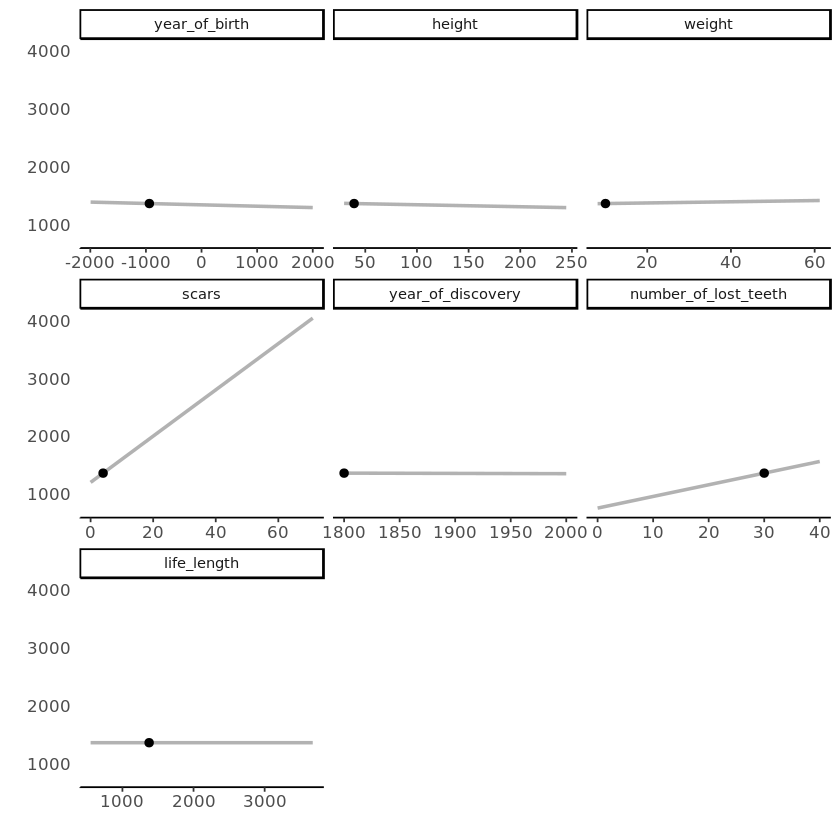

In [6]:
plot(ivp_lm)

Calculate oscillations for individual variable profiles.

In [7]:
individual_variable_oscillations(ivp_lm)

,_vname_,_ids_,oscillations
4,scars,1,303.527304
7,number_of_lost_teeth,1,256.521395
1,year_of_birth,1,28.879857
2,height,1,11.577374
5,colour,1,9.674773
3,weight,1,9.379154
6,year_of_discovery,1,4.668156
8,life_length,1,0.000000


Ceteris paribus plots for neighbourhood sample, random sample, selected variables.

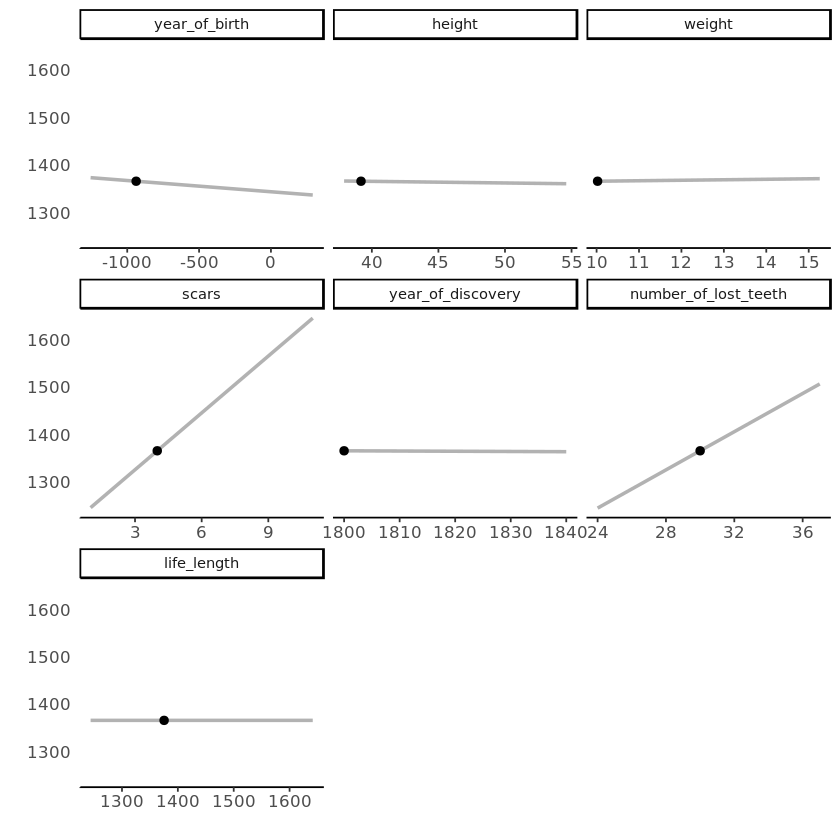

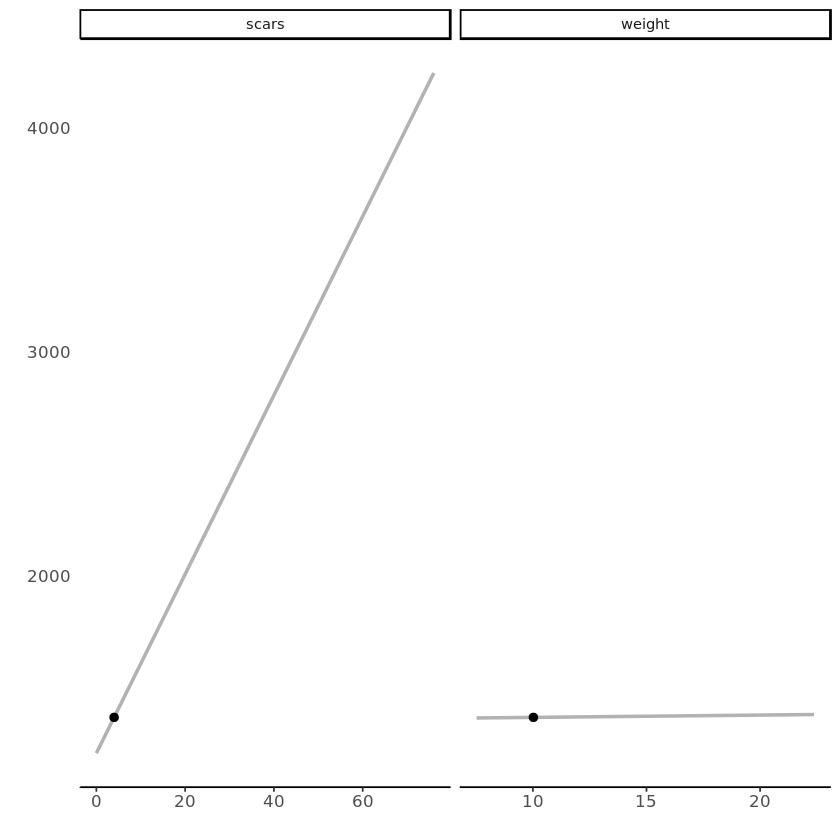

In [8]:
ivp_lm_neighbours <- individual_variable_profile(m_lm,
                            data = similar_dragons,
                            new_observation =  new_observation)
plot(ivp_lm_neighbours)
ivp_lm_random <- individual_variable_profile(m_lm,
                            data = random_dragons,
                            new_observation =  new_observation,
                            variable_splits = variable_splits)
plot(ivp_lm_random)

Data frame with profiles.

In [9]:
profiles <- calculate_variable_profile(data = new_observation,
                                       variable_splits = variable_splits,
                                       model = m_lm)
head(profiles)

,year_of_birth,height,weight,scars,colour,year_of_discovery,number_of_lost_teeth,life_length,_yhat_,_vname_,_ids_
1,-938,39.18619,10.02391,0,black,1800,30,1375.38,1206.269,scars,1
1.1,-938,39.18619,10.02391,0,black,1800,30,1375.38,1206.269,scars,1
1.2,-938,39.18619,10.02391,0,black,1800,30,1375.38,1206.269,scars,1
1.3,-938,39.18619,10.02391,0,black,1800,30,1375.38,1206.269,scars,1
1.4,-938,39.18619,10.02391,0,black,1800,30,1375.38,1206.269,scars,1
1.5,-938,39.18619,10.02391,0,black,1800,30,1375.38,1206.269,scars,1


For another type of models we proceed analogously.

## randomForest

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



,_vname_,_ids_,oscillations
4,scars,1,240.233362
7,number_of_lost_teeth,1,197.911139
3,weight,1,22.126289
1,year_of_birth,1,14.343081
2,height,1,8.292510
5,colour,1,7.818567
6,year_of_discovery,1,0.000000
8,life_length,1,0.000000


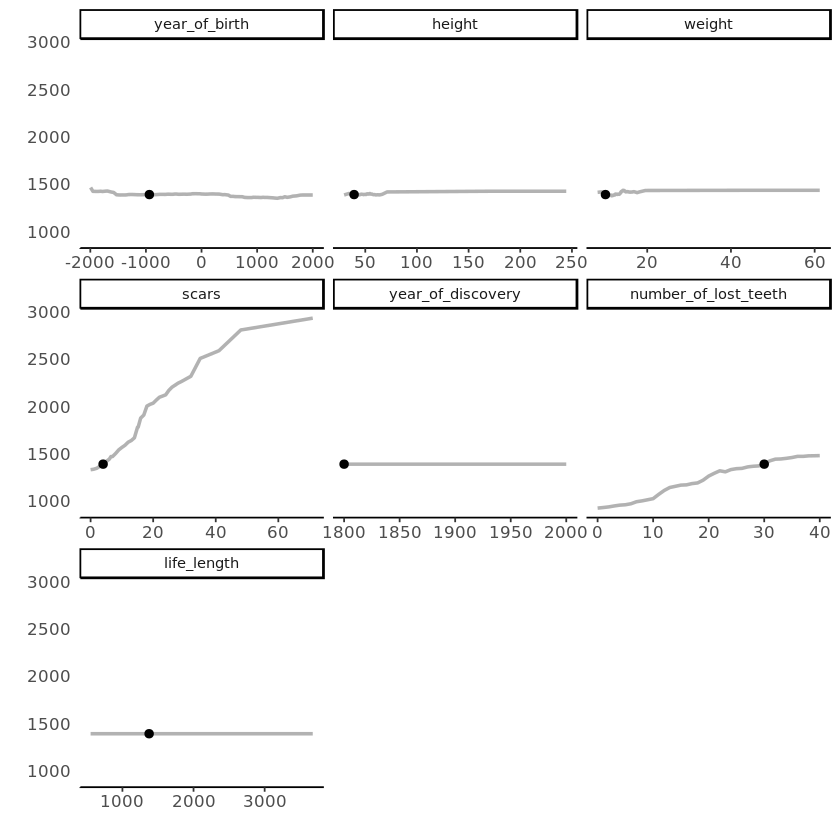

In [10]:
install.packages("randomForest")
library(randomForest)
m_rf <- randomForest(life_length ~ . , data = dragons)
ivp_rf <- individual_variable_profile(m_rf,
                            data = dragons_test,
                            new_observation =  new_observation)
plot(ivp_rf)
individual_variable_oscillations(ivp_rf)

## SVM

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


,_vname_,_ids_,oscillations
4,scars,1,257.810545
7,number_of_lost_teeth,1,252.329330
6,year_of_discovery,1,193.568376
2,height,1,73.189450
3,weight,1,64.262240
1,year_of_birth,1,21.201061
5,colour,1,9.944522
8,life_length,1,0.000000


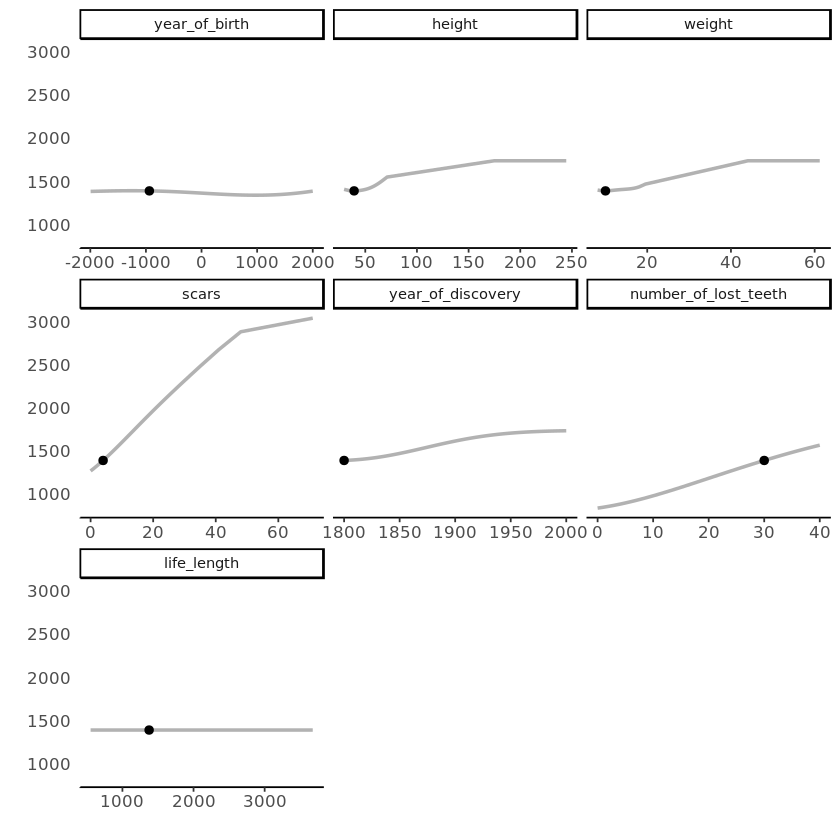

In [11]:
install.packages("e1071")
library(e1071)
m_svm <- svm(life_length ~ . , data = dragons)
ivp_svm <- individual_variable_profile(m_svm,
                            data = dragons_test,
                            new_observation =  new_observation)
plot(ivp_svm)
individual_variable_oscillations(ivp_svm)

## knn

In [12]:
#install.packages("caret")
library(caret)
m_knn <- knnreg(life_length ~ . , data = dragons, k = 5)
ivp_knn <- individual_variable_profile(m_knn,
                            data = dragons_test,
                            new_observation =  new_observation)
plot(ivp_knn)
individual_variable_oscillations(ivp_knn)

ERROR: Error in library(caret): there is no package called ‘caret’


## nnet

When you use `nnet` package for regression, remember to normalize the resposne variable, in such a way that it is from interval $(0,1)$.

In this case creating own predict function is also needed.

# weights:  111
initial  value 4306.457401 
iter  10 value 27.484409
iter  20 value 27.461726
iter  30 value 27.441836
iter  40 value 26.927512
iter  50 value 11.751385
iter  60 value 10.480165
iter  70 value 9.584872
iter  80 value 6.521027
iter  90 value 1.958392
iter 100 value 0.574050
final  value 0.574050 
stopped after 100 iterations


Warning message in x[x$`_vname_` == variable & x$`_ids_` == id, "_yhat_"] - observations[id, :
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in x[x$`_vname_` == variable & x$`_ids_` == id, "_yhat_"] - observations[id, :
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in x[x$`_vname_` == variable & x$`_ids_` == id, "_yhat_"] - observations[id, :
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in x[x$`_vname_` == variable & x$`_ids_` == id, "_yhat_"] - observations[id, :
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in x[x$`_vname_` == variable & x$`_ids_` == id, "_yhat_"] - observations[id, :
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() inste

,_vname_,_ids_,oscillations
4,scars,1,302.451233
7,number_of_lost_teeth,1,228.646478
6,year_of_discovery,1,41.300208
3,weight,1,34.548968
1,year_of_birth,1,33.714264
2,height,1,16.746760
5,colour,1,9.792859
8,life_length,1,0.000000


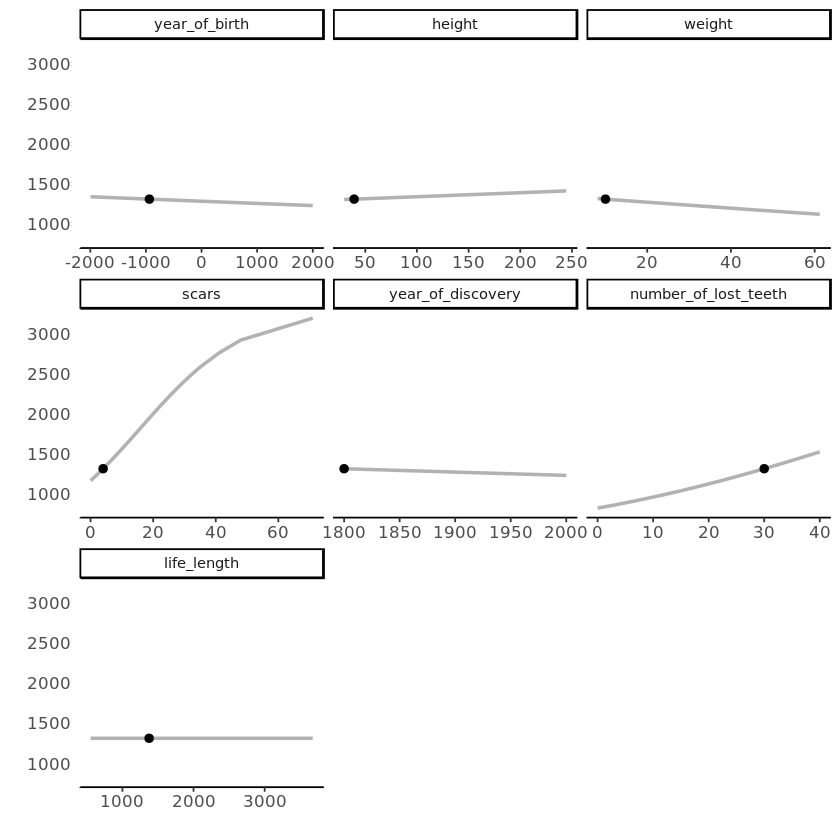

In [13]:
library(nnet)

x <- max(abs(dragons$life_length))
digits <- floor(log10(x))
normalizing_factor <- round(x, -digits)
m_nnet <- nnet(life_length/normalizing_factor ~ . , data = dragons, size = 10, linout = TRUE)

p_fun <- function(model, new_observation){
  predict(model, newdata = new_observation)*normalizing_factor
}

ivp_nnet <- individual_variable_profile(m_nnet,
                            data = dragons_test,
                            new_observation =  new_observation,
                            predict_function = p_fun)
plot(ivp_nnet)
individual_variable_oscillations(ivp_nnet)

## Several models at once

To produce plot with many models in one graph, use argument `color = _label_`.

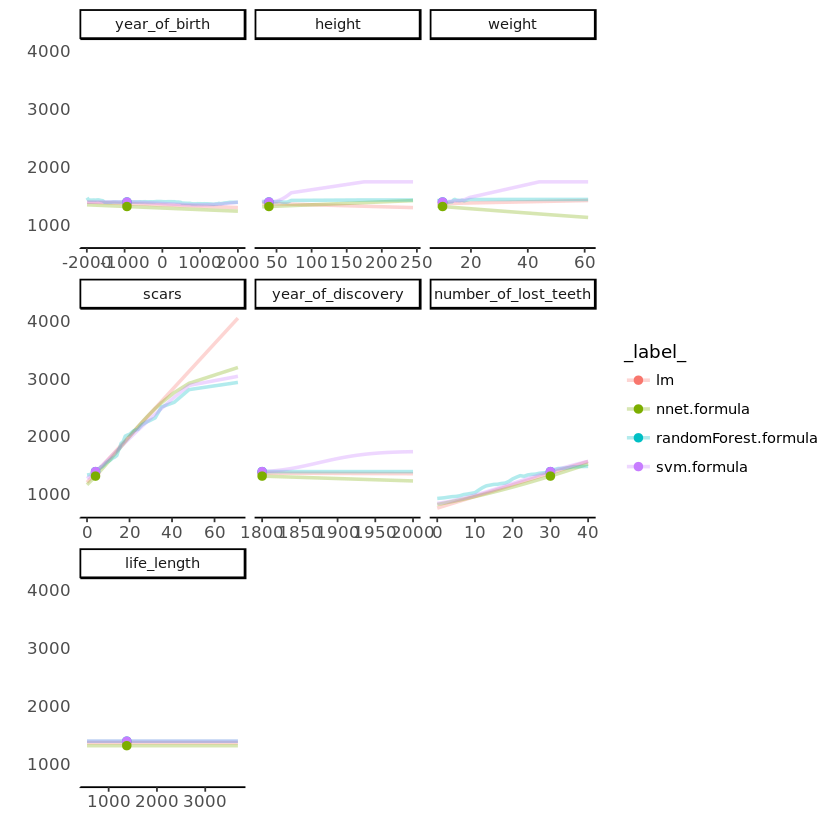

In [15]:
plot(ivp_lm, ivp_rf, ivp_svm, ivp_nnet, color = "_label_")